In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from king_tensor.screen import Screen

In [8]:
%matplotlib inline

In [11]:
root_dir = pathlib.Path().resolve().parents[0]
data_dir = root_dir / 'data'
img_dir = data_dir / 'card_templates'
config_dir = root_dir / 'king_tensor' / 'config' / 'ui.yaml'

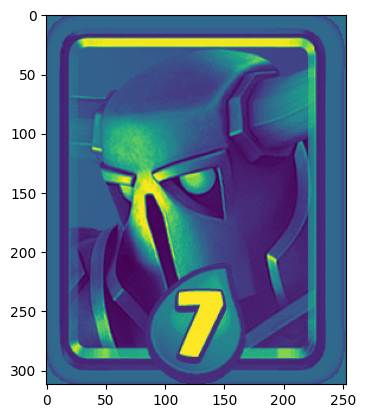

In [23]:
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in img_dir.glob('*.png')]
pekka = images[0]
plt.imshow(pekka)
plt.show()

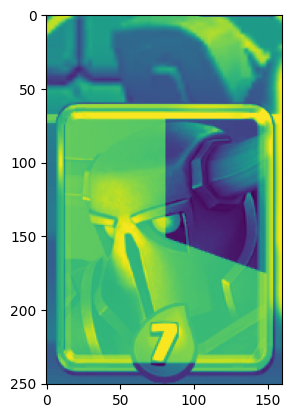

In [34]:
board_image = cv2.imread(data_dir / 'IMG_1470.PNG', cv2.IMREAD_GRAYSCALE)
screen = Screen(board_image, config_dir)
images = []
images.append(screen.images['card_slot_1'])
images.append(screen.images['card_slot_2'])
images.append(screen.images['card_slot_3'])
images.append(screen.images['card_slot_4'])
card_ids = ['magic archer', 'bandit', 'pekka', 'fireball']
plt.imshow(images[2])
plt.show()

In [33]:
best_match = 0
for image, troop in zip(images, card_ids):
    match = cv2.matchTemplate(pekka, image, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)
    print(troop, max_val)
    best_match = max(max_val, best_match) 

print(best_match)

magic archer 0.25599151849746704
bandit 0.17768734693527222
pekka 0.3063834309577942
fireball 0.30139780044555664
0.3063834309577942


Our bot wrongfully concludes that this card is a fireball. I think the problem is that the cards are not the same scale, so let's do some edge detection to try to create a good crop of our very rough crop

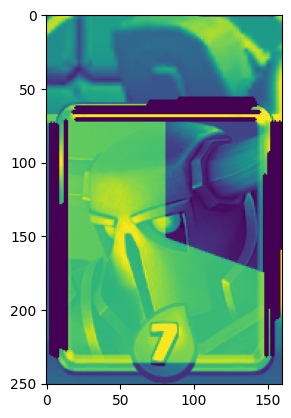

In [41]:
edges = cv2.Canny(images[2], 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50)

for l in lines:
    x1, y1, x2, y2 = l[0]
    cv2.line(images[2], (x1,y1), (x2,y2), (0,255,0), 2)

plt.imshow(images[2])
plt.show()